# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood

### Name: Yun Kyaw , 251107...

### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for one observation of a single Poisson random variable is

$$\ell(\lambda; y) = -\Bigg(   y\cdot \ln(\lambda) - \lambda - \ln(y) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with the same parameter $\lambda$, is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with a *different* parameter $\lambda$ for each one, is

$$\ell(\boldsymbol{\lambda}; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda_i) - \lambda_i - \ln(y_i!) \Bigg)$$

See the difference?

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. Use numpy functions so that you don't need to use loops. Also, note that the $\sum_{i} \ln(y!)$ term does not affect the location of the maximum because it does not change with $\lambda$, and so you can (and should) omit the $ \ln(y!)$ in your function.

Your code should work for two cases:

First, it should work with a scalar $\lambda$ and a vector $y$. Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

Second, it should work with a vector $\lambda$ and a vector $y$, if they have the same length. (This is the last likelihood function described above.) Test your function by calling it with `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`. In this second case, the first $\lambda$ should be used to evaluate the first $y$, the second $\lambda$ should be used to evaluat the second $y$, and so on. ***YOU SHOULD NOT USE ANY LOOPS - BOTH CASES SHOULD WORK IF YOU CODE IT IN THE SIMPLEST WAY BECAUSE OF HOW NUMPY WORKS.**

**Answer the following below in markdown:** What happens when you set an element of lam to 0 or a negative number and why? 


**Answer:**

If lambda is less than, or equal to 0 the function will not work as you cannot take the log of either, and the log will be undefined. This is because $log_a(x) = y$, and $a^y = x$ - thus, if $a^y <= 0$, we will not be able to find any values of y that can fulfill the equation and equate to 0 or a negative number.

In [2]:
def poissonNegLogLikelihood(lam,y):
    neg_log_lik = -np.sum(y * np.log(lam) - lam)
    return neg_log_lik

In [3]:
# testing the function
lam = 1.3
y = np.array([2,1,0,0])
test1 = poissonNegLogLikelihood(lam,y)
print(test1)

lam = np.array([1,0.5,1,3])
y = np.array([2,1,0,0])
test2 = poissonNegLogLikelihood(lam,y)
print(test2)

4.412907206597527
6.193147180559945


---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. Hint: Numpy implements the exponential using `np.exp`.

Hint: You should use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [4]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(X@b)

    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam, y)

    return neg_log_lik

In [5]:
# testing the function
b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])

test3 = poissonRegressionNegLogLikelihood(b, X, y)
print(test3)

3211.7843052468816


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) Here, we took the exponential function of $X\beta$ because when calculating the log likelihood, we take $log\beta$. Thus, as the exponential function and log function are opposite, they will cancel out, and we will be left with $y-\lambda-\lambda$, which implies that we will be left with our y values.

b) If we didn't take the exponential function of this, then we would  get negative values for $\lambda$, which would not be valid parameters because we cannot take the log of a negative number.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [6]:
def modelPrediction(b,X):
    yhat = np.exp(X@b)
    return yhat

In [7]:
# Testing the model
b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T

model_pred = modelPrediction(b,X)
print(model_pred)

[ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? \
Our estimated $\beta$ are [0.94827556 -0.52953521]

In [8]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It should have the same number of elements as X as columns
    beta_start = [0,0]

    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args = (X, y))
    # Extract the maximum likelihood estimates from the optimizer.

    betas = mle.x
    return betas

In [9]:
# Testing the function
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])

test_fitModel = fitModel(X,y)
print("The estimated betas are:", test_fitModel)

The estimated betas are: [ 0.94827556 -0.52953521]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

Text(0, 0.5, 'Y')

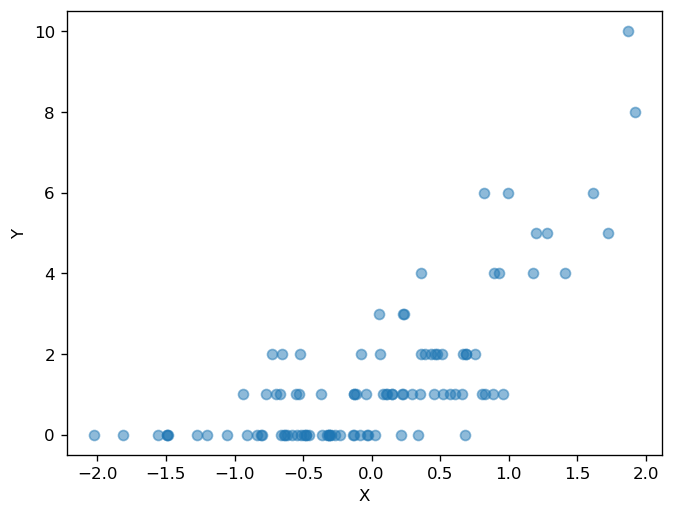

In [10]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
plt.scatter(x = df['x'], y = df['y'], alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")

In [11]:
# Fit the model.  Use your functions.  
x = df.x.values 
design_x = np.repeat(1, len(x))
X = np.column_stack((design_x, x))
y = df.y.values

In [12]:
# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.linspace(-2,2,len(y))

# Make predictions on the new data
y_predicted = modelPrediction(betas,X)

# Creating a new data frame with the predictions
y_pred_df = pd.DataFrame({'X':newX, 'Y': y_predicted})

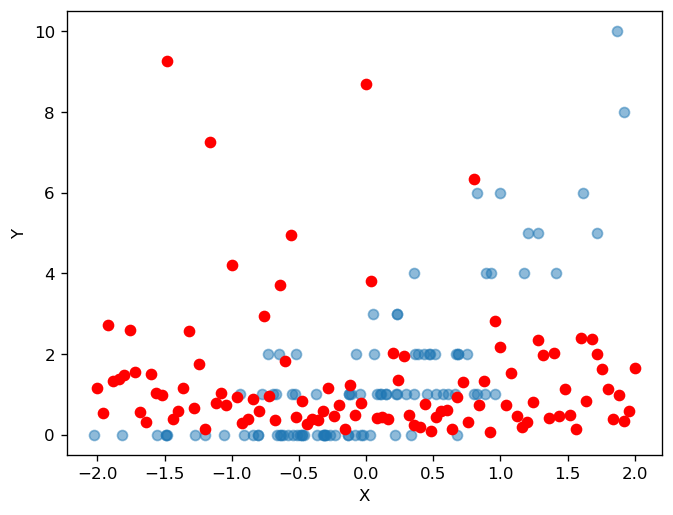

In [13]:
#Finally, plot the predictions on the same axis and color the predictions red
fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
plt.scatter(x = df['x'], y = df['y'], alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")

# Addiing predictions to the same axis in red
plt.scatter(y_pred_df['X'], y_pred_df['Y'], label = "Predictions", color = 'red')

### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


In [14]:
# Read in the data
df = pd.read_csv("poisson_regression_data.csv")
y = df.y.values
x = df.x.values
newX = np.column_stack((np.repeat(1, len(x)), x))

In [15]:
# fit the model
ols_fit = linear_model.LinearRegression()
ols_fit.fit(newX, y)

# making predictions over [-2, 2]
spaced_x = np.linspace(-2,2,len(y))
X_pred = np.column_stack((np.repeat(1, len(spaced_x)), spaced_x))
y_pred = ols_fit.predict(X_pred)

# Getting the R2
R2_sklearn = ols_fit.score(newX, y)
print("The R2 value is:", R2_sklearn)

# creating a new dataframe with the predictions
OLS_pred_df = pd.DataFrame({'X':spaced_x, 'Y': y_pred})

The R2 value is: 0.5202628900095028


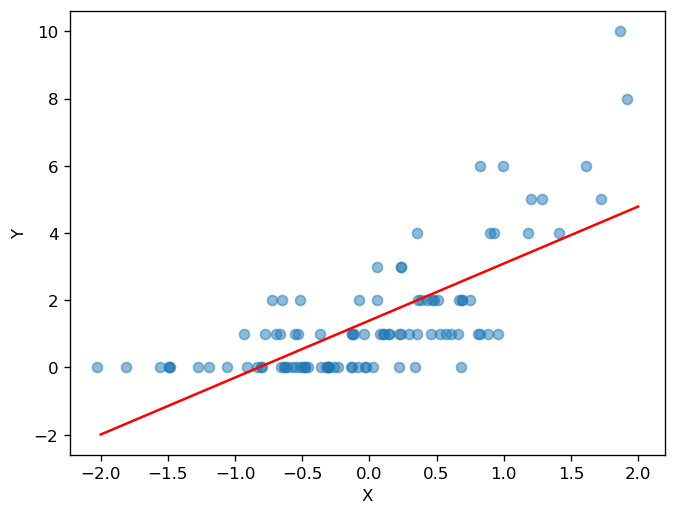

In [16]:
# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
plt.scatter(x = df['x'], y = df['y'], alpha = 0.5)
plt.xlabel("X")
plt.ylabel("Y")

# Addiing predictions to the same axis in red
plt.plot(OLS_pred_df['X'], OLS_pred_df['Y'], label = "Predictions", color = 'red')

### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

**Answer:**
A major issue from the linear regression is that the domain of the predictions isn't the same as the real Y values. The linear regression minimum Y value is found it be -2, however, as in actuality we are looking at counts, we cannot have a negative count. Similarly, we cannot have non-integer counts (y values), while in the linear regression predictions we are able to obtain non-integer values.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.